# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

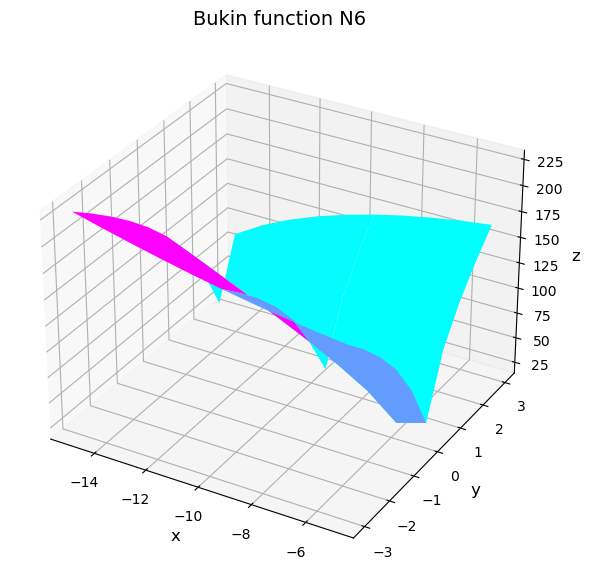

In [19]:
import matplotlib.pyplot as plt
import numpy as np
# import ipyvolume as ipv

def f(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * x**2)) + 0.01 * np.abs(x + 10)

x = np.linspace(-15, -5, 10)
y = np.linspace(-3, 3, 10)
X, Y = np.meshgrid(x, y)
z = f(X,Y)

fig = plt.figure(figsize = (12, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, z, rstride=5, cstride=5, cmap='cool')
ax.set_title("Bukin function N6", fontsize = 14)
ax.set_xlabel('x', fontsize = 12)
ax.set_ylabel('y', fontsize = 12)
ax.set_zlabel('z', fontsize = 12)
plt.show()


# ipv.figure(figsize = (12, 7))
# ipv.plot_surface(X, Y, z, color="cool")
# ipv.xlabel("x", fontsize = 12)
# ipv.ylabel("y", fontsize = 12)
# ipv.zlabel("z", fontsize = 12)
# ipv.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [29]:

def hill_climbing():
    # Initialize the current state randomly
    current_state = np.random.uniform([-15, -3], [-5, 3])
    
    best_state = current_state
    best_value = f(*current_state)

    # Define the perturbation size for generating neighbors
    step = 1

    # Define the stop criterion
    max_iterations = 1000
    iteration = 0

    # Perform hill climbing
    while iteration < max_iterations:
        # Generate neighbours by perturbing the current state
        neighbours = [
            (current_state[0] + np.random.uniform(-step, step),
             current_state[1] + np.random.uniform(-step, step))
            for _ in range(10)
        ]

        # Evaluate the objective function for each neighbor
        neighbour_values = [f(*neighbour) for neighbour in neighbours]

        # Find the neighbor with the best value
        best_neighbour_index = np.argmin(neighbour_values)
        best_neighbour_value = neighbour_values[best_neighbour_index]
        best_neighbour = neighbours[best_neighbour_index]

        # Check if the best neighbor improves the current state
        if best_neighbour_value < best_value:
            best_state = best_neighbour
            best_value = best_neighbour_value

        # Move to the best neighbor
        current_state = best_neighbour

        iteration += 1

    return best_state, best_value

# Run the hill climbing algorithm
min_point, min_value = hill_climbing()

print('f minimum point is:', min_point)
print('value in this point:', min_value)

f minimum point is: (-5.507717161206823, 0.3033074019734032)
value in this point: 0.6936238775491854


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [30]:
import numpy as np

def knapsack_value(weights, values, capacity, state):
    """Calculate the value of the knapsack given a state."""
    total_value = 0
    total_weight = 0
    for i in range(len(state)):
        if state[i] == 1:
            total_value += values[i]
            total_weight += weights[i]
            if total_weight > capacity:
                return 0
    return total_value

def generate_neighbors(state):
    """Generate neighbors by switching a zero to one at a position in the state."""
    neighbors = []
    for i in range(len(state)):
        if state[i] == 0:
            neighbor = state.copy()
            neighbor[i] = 1
            neighbors.append(neighbor)
    return neighbors

def hill_climbing_knapsack(weights, values, capacity):
    n = len(weights)

    # Initialize the current state with all zeros
    current_state = np.zeros(n)

    # Initialize the best state and its value
    best_state = current_state
    best_value = knapsack_value(weights, values, capacity, current_state)

    # Define the stop criterion
    max_iterations = 1000
    iteration = 0

    # Perform hill climbing
    while iteration < max_iterations:
        # Generate neighbors by switching a zero to one
        neighbors = generate_neighbors(current_state)

        # Check if there are valid neighbors
        if len(neighbors) == 0:
            break

        # Evaluate the objective function for each neighbor
        neighbor_values = [knapsack_value(weights, values, capacity, neighbor) for neighbor in neighbors]

        # Find the neighbor with the best value
        best_neighbor_index = np.argmax(neighbor_values)
        best_neighbor_value = neighbor_values[best_neighbor_index]
        best_neighbor = neighbors[best_neighbor_index]

        # Check if the best neighbor improves the current state
        if best_neighbor_value > best_value:
            best_state = best_neighbor
            best_value = best_neighbor_value

        # Move to the best neighbor
        current_state = best_neighbor

        iteration += 1

    return best_state.astype(int), best_value


values = [3, 4, 5, 6]
weights = [2, 3, 4, 5]
capacity = 8

solution, best_value = hill_climbing_knapsack(weights, values, capacity)

print("Solution:", solution)
print("Maximum value:", best_value)

Solution: [0 1 0 1]
Maximum value: 10



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [39]:
import numpy as np

def hill_climbing_knapsack_improved(values, weights, capacity, iterations=10):
    best_solution = None
    best_value = -np.inf
    
    for _ in range(iterations):
        solution, value = hill_climbing_knapsack(weights, values, capacity)
        
        if value > best_value:
            best_solution = solution
            best_value = value
    
    return best_solution.astype(int), best_value

values = [3, 4, 5, 6]
weights = [2, 3, 4, 5]
capacity = 8

solution, best_value = hill_climbing_knapsack_improved(values, weights, capacity)

print("Solution:", solution)
print("Maximum value:", best_value)

Solution: [0 1 0 1]
Maximum value: 10
